In [1]:
%pylab inline
import numpy as np
np.set_printoptions(precision=6, linewidth=110)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pycbc.filter
import pycbc.types
import pycbc.psd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib
matplotlib.__version__

'2.2.2'

In [3]:
sys.path.insert(0, '../../src')

import waveform as wave
import waveformset as ws
import surrogate
import diagnostics
import plotparams

import imp
imp.reload(wave)
imp.reload(ws)
imp.reload(surrogate)
imp.reload(diagnostics)
imp.reload(plotparams)

import constants
imp.reload(constants)
from constants import *

# Distribution of errors

In [40]:
# Load errors data

# Matern 5/2
errors_lhd = np.loadtxt('../../data/TEOBv4QM_production/errors_test_set2_lhd_xi.txt')
errors_uncsamp = np.loadtxt('../../data/TEOBv4QM_production/errors_test_set2_lhd_uncsamp_xi.txt')
errors_uniform = np.loadtxt('../../data/TEOBv4QM_production/errors_test_set2_lhd_uniform_xi.txt')
errors_uncsamp_uniform = np.loadtxt('../../data/TEOBv4QM_production/errors_test_set2_lhd_uncsamp_uniform_xi.txt')

# Squared exponential
errors_lhd_sqexp = np.loadtxt('../../data/TEOBv4QM_production/errors_test_set2_lhd_xi_sqexp.txt')
errors_uncsamp_sqexp = np.loadtxt('../../data/TEOBv4QM_production/errors_test_set2_lhd_uncsamp_xi_sqexp.txt')
errors_uniform_sqexp = np.loadtxt('../../data/TEOBv4QM_production/errors_test_set2_lhd_uniform_xi_sqexp.txt')
errors_uncsamp_uniform_sqexp = np.loadtxt('../../data/TEOBv4QM_production/errors_test_set2_lhd_uncsamp_uniform_xi_sqexp.txt')

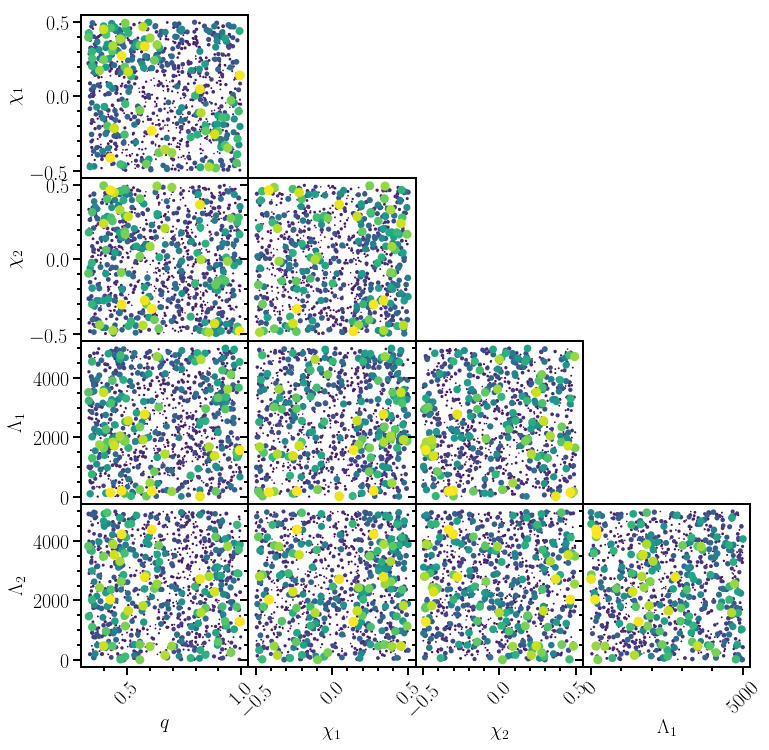

In [48]:
j=8

params = errors_uncsamp_uniform[:, :5]
error = errors_uncsamp_uniform[:, j]

labels = [r'$q$', r'$\chi_1$', r'$\chi_2$', r'$\Lambda_1$', r'$\Lambda_2$']
fig, ax = diagnostics.error_2d_triangle_plot(params, error, labels, threshold=None, figsize=(12, 12))

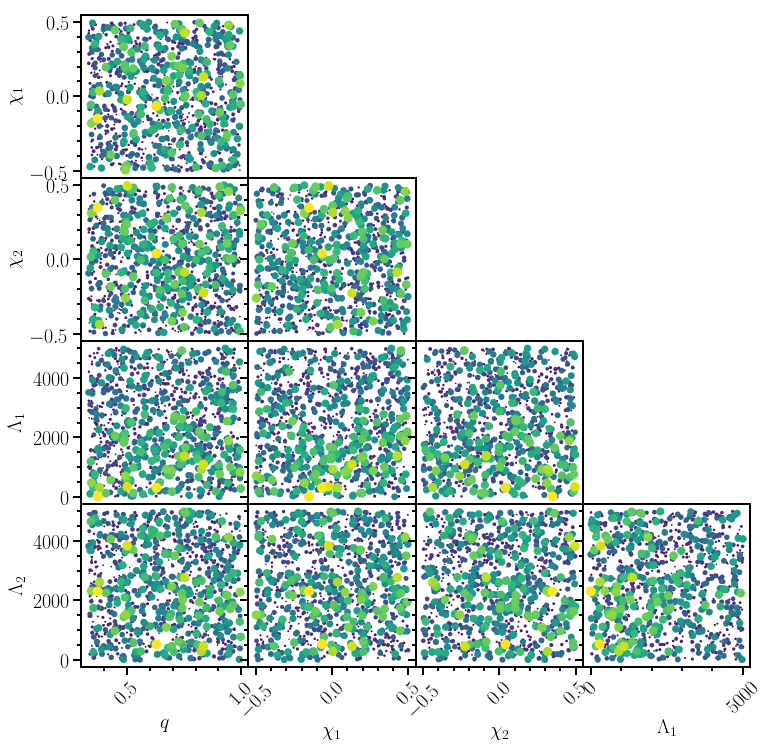

In [49]:
j=8

params = errors_uncsamp_uniform_sqexp[:, :5]
error = errors_uncsamp_uniform_sqexp[:, j]

labels = [r'$q$', r'$\chi_1$', r'$\chi_2$', r'$\Lambda_1$', r'$\Lambda_2$']
fig, ax = diagnostics.error_2d_triangle_plot(params, error, labels, threshold=None, figsize=(12, 12))

# Sampled parameters

In [32]:
trainset = ws.HDF5WaveformSet('../../data/TEOBv4QM_production/dh_train_lhd_uncsamp_uniform_xi.hdf5')
params_all = trainset.parameters()

# Split into subsets
params_lhd = params_all[:160]
params_uncsamp = params_all[160:560]
params_rand = params_all[560:]
print len(params_lhd), len(params_uncsamp), len(params_rand), len(params_all)


trainset_sqexp = ws.HDF5WaveformSet('../../data/TEOBv4QM_production/dh_train_lhd_uncsamp_uniform_xi_sqexp.hdf5')
params_all_sqexp = trainset_sqexp.parameters()

# Split into subsets
params_lhd_sqexp = params_all_sqexp[:160]
params_uncsamp_sqexp = params_all_sqexp[160:560]
params_rand_sqexp = params_all_sqexp[560:]
print len(params_lhd_sqexp), len(params_uncsamp_sqexp), len(params_rand_sqexp), len(params_all_sqexp)

160 400 400 960
160 400 400 960


In [50]:
def xi_of_lam(lam, a=100):
    return np.log10(lam/a + 1)

xi_of_lam(5000)

1.7075701760979363

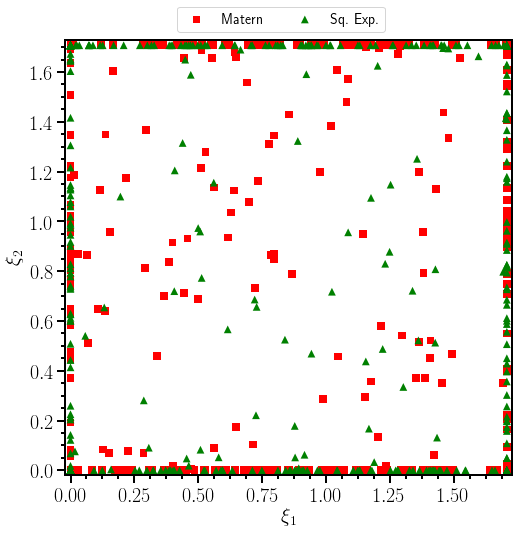

In [58]:
fig, axes = plt.subplots(1, figsize=(8, 8))

x, y = params_uncsamp[:, 3], params_uncsamp[:, 4]
x = xi_of_lam(x)
y = xi_of_lam(y)
axes.scatter(x, y, c='r', edgecolor='none', marker='s', s=60, label='Matern')

x, y = params_uncsamp_sqexp[:, 3], params_uncsamp_sqexp[:, 4]
x = xi_of_lam(x)
y = xi_of_lam(y)
axes.scatter(x, y, c='g', edgecolor='none', marker='^', s=60, label='Sq. Exp.')

axes.set_xlim(-0.02, 1.727)
axes.set_ylim(-0.02, 1.727)
axes.set_xlabel(r'$\xi_1$')
axes.set_ylabel(r'$\xi_2$')
axes.minorticks_on()
axes.legend(ncol=3, loc=(0.25, 1.02))

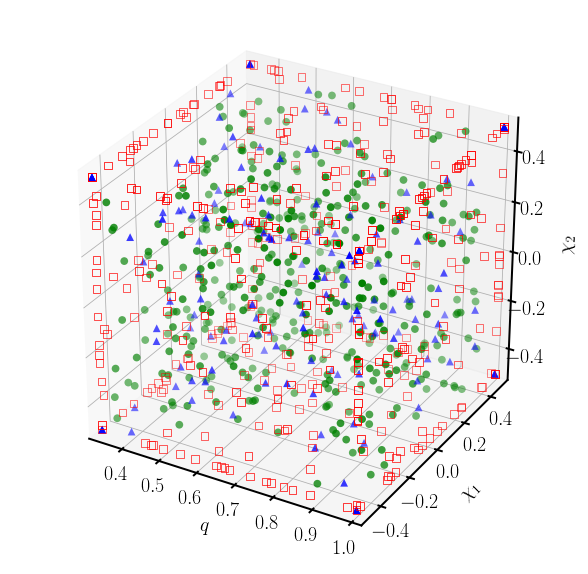

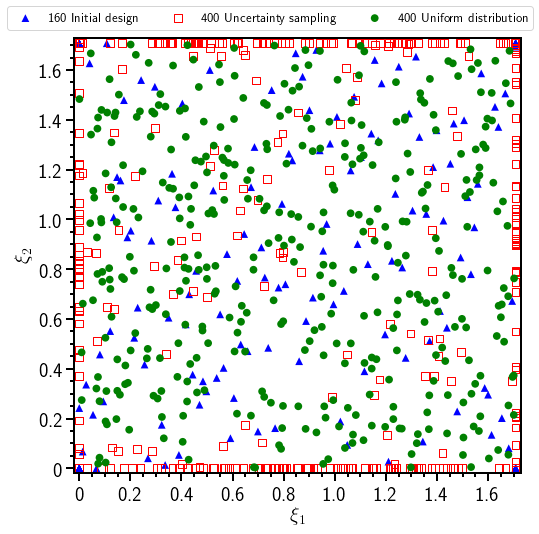

In [121]:
# Matern kernel

fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot(111, projection='3d')

x, y, z = params_lhd[:, 0], params_lhd[:, 1], params_lhd[:, 2]
axes.scatter(x, y, z, c='b', edgecolor='none', marker='^', s=60)

x, y, z = params_uncsamp[:, 0], params_uncsamp[:, 1], params_uncsamp[:, 2]
axes.scatter(x, y, z, edgecolor='r', facecolor='none', marker='s', s=60)

x, y, z = params_rand[:, 0], params_rand[:, 1], params_rand[:, 2]
axes.scatter(x, y, z, c='g', edgecolor='none', marker='o', s=60)

axes.set_xlim(0.325, 1.01)
axes.set_ylim(-0.51, 0.51)
axes.set_zlim(-0.51, 0.51)
axes.set_xlabel(r'$q$', labelpad=10)
axes.set_ylabel(r'$\chi_1$', labelpad=15)
axes.set_zlabel(r'$\chi_2$', labelpad=18)
#fig.savefig('../../paper/trainingset3d.pdf', format='pdf', transparent=True, bbox_inches='tight')


fig, axes = plt.subplots(1, figsize=(8, 8))

x, y = params_lhd[:, 3], params_lhd[:, 4]
x = xi_of_lam(x)
y = xi_of_lam(y)
axes.scatter(x, y, c='b', edgecolor='none', marker='^', s=60, label='160 Initial design')

x, y = params_uncsamp[:, 3], params_uncsamp[:, 4]
x = xi_of_lam(x)
y = xi_of_lam(y)
axes.scatter(x, y, edgecolor='r', facecolor='none', marker='s', s=60, label='400 Uncertainty sampling')

x, y = params_rand[:, 3], params_rand[:, 4]
x = xi_of_lam(x)
y = xi_of_lam(y)
axes.scatter(x, y, c='g', edgecolor='none', marker='o', s=60, label='400 Uniform distribution')

axes.set_xlim(-0.02, 1.727)
axes.set_ylim(-0.02, 1.727)
axes.set_xlabel(r'$\xi_1$')
axes.set_ylabel(r'$\xi_2$')
ticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6]
axes.set_xticks(ticks)
axes.set_xticklabels(ticks)
axes.set_yticks(ticks)
axes.set_yticklabels(ticks)
axes.minorticks_on()
axes.legend(ncol=3, loc=(-0.15, 1.02), fontsize=13)
#fig.savefig('../../paper/trainingset2d.pdf', format='pdf', transparent=True, bbox_inches='tight')

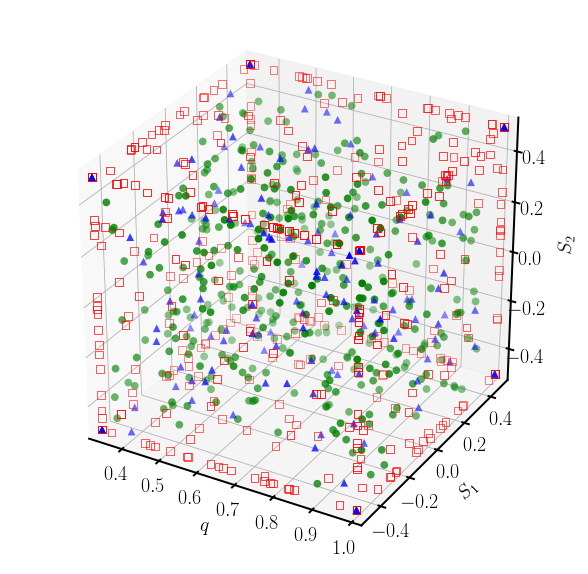

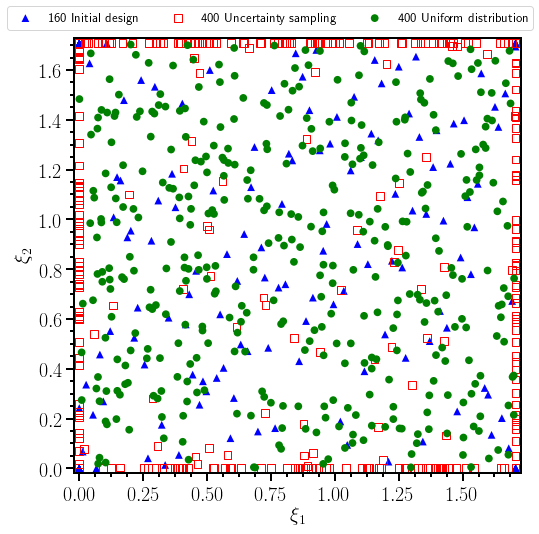

In [75]:
# Squared exponential kernel

fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot(111, projection='3d')

x, y, z = params_lhd_sqexp[:, 0], params_lhd_sqexp[:, 1], params_lhd_sqexp[:, 2]
axes.scatter(x, y, z, c='b', edgecolor='none', marker='^', s=60)

x, y, z = params_uncsamp_sqexp[:, 0], params_uncsamp_sqexp[:, 1], params_uncsamp_sqexp[:, 2]
axes.scatter(x, y, z, edgecolor='r', facecolor='none', marker='s', s=60)

x, y, z = params_rand_sqexp[:, 0], params_rand_sqexp[:, 1], params_rand_sqexp[:, 2]
axes.scatter(x, y, z, c='g', edgecolor='none', marker='o', s=60)

axes.set_xlim(0.325, 1.01)
axes.set_ylim(-0.51, 0.51)
axes.set_zlim(-0.51, 0.51)
axes.set_xlabel('$q$', labelpad=10)
axes.set_ylabel('$S_1$', labelpad=15)
axes.set_zlabel('$S_2$', labelpad=18)
#fig.savefig('../../paper/trainingset3d.pdf', format='pdf', transparent=True, bbox_inches='tight')


fig, axes = plt.subplots(1, figsize=(8, 8))

x, y = params_lhd_sqexp[:, 3], params_lhd_sqexp[:, 4]
x = xi_of_lam(x)
y = xi_of_lam(y)
axes.scatter(x, y, c='b', edgecolor='none', marker='^', s=60, label='160 Initial design')

x, y = params_uncsamp_sqexp[:, 3], params_uncsamp_sqexp[:, 4]
x = xi_of_lam(x)
y = xi_of_lam(y)
axes.scatter(x, y, edgecolor='r', facecolor='none', marker='s', s=60, label='400 Uncertainty sampling')

x, y = params_rand_sqexp[:, 3], params_rand_sqexp[:, 4]
x = xi_of_lam(x)
y = xi_of_lam(y)
axes.scatter(x, y, c='g', edgecolor='none', marker='o', s=60, label='400 Uniform distribution')

axes.set_xlim(-0.02, 1.727)
axes.set_ylim(-0.02, 1.727)
axes.set_xlabel(r'$\xi_1$')
axes.set_ylabel(r'$\xi_2$')
axes.minorticks_on()
axes.legend(ncol=3, loc=(-0.15, 1.02), fontsize=13)
#fig.savefig('../../paper/trainingset2d.pdf', format='pdf', transparent=True, bbox_inches='tight')

# Amplitude and phase error

In [77]:
###### Matern 5/2 ########

gp_amp_filename = '../../data/TEOBv4QM_production/gp_spline_amp_corners_lhd_xi.hdf5'
gp_phase_filename = '../../data/TEOBv4QM_production/gp_spline_phase_corners_lhd_xi.hdf5'
nodes_filename = '../../data/TEOBv4QM_production/nodes_corners_lhd_xi.hdf5'
sur_lhd = surrogate.GPSplineSurrogate.load(
    nodes_filename, gp_amp_filename, gp_phase_filename, 
    order=3, npoints=10000, quad1=None, quad2=None, spin_spin=False)

gp_amp_filename = '../../data/TEOBv4QM_production/gp_spline_amp_lhd_uniform_xi.hdf5'
gp_phase_filename = '../../data/TEOBv4QM_production/gp_spline_phase_lhd_uniform_xi.hdf5'
nodes_filename = '../../data/TEOBv4QM_production/nodes_lhd_uniform_xi.hdf5'
sur_uniform = surrogate.GPSplineSurrogate.load(
    nodes_filename, gp_amp_filename, gp_phase_filename, 
    order=3, npoints=10000, quad1=None, quad2=None, spin_spin=False)

gp_amp_filename = '../../data/TEOBv4QM_production/gp_spline_amp_lhd_uncsamp_xi.hdf5'
gp_phase_filename = '../../data/TEOBv4QM_production/gp_spline_phase_lhd_uncsamp_xi.hdf5'
nodes_filename = '../../data/TEOBv4QM_production/nodes_lhd_uncsamp_xi.hdf5'
sur_uncsamp = surrogate.GPSplineSurrogate.load(
    nodes_filename, gp_amp_filename, gp_phase_filename, 
    order=3, npoints=10000, quad1=None, quad2=None, spin_spin=False)

gp_amp_filename = '../../data/TEOBv4QM_production/gp_spline_amp_lhd_uncsamp_uniform_xi.hdf5'
gp_phase_filename = '../../data/TEOBv4QM_production/gp_spline_phase_lhd_uncsamp_uniform_xi.hdf5'
nodes_filename = '../../data/TEOBv4QM_production/nodes_lhd_uncsamp_uniform_xi.hdf5'
sur_uncsamp_uniform = surrogate.GPSplineSurrogate.load(
    nodes_filename, gp_amp_filename, gp_phase_filename, 
    order=3, npoints=10000, quad1=None, quad2=None, spin_spin=False)

###### Squared exponential ########

gp_amp_filename = '../../data/TEOBv4QM_production/gp_spline_amp_corners_lhd_xi_sqexp.hdf5'
gp_phase_filename = '../../data/TEOBv4QM_production/gp_spline_phase_corners_lhd_xi_sqexp.hdf5'
nodes_filename = '../../data/TEOBv4QM_production/nodes_corners_lhd_xi_sqexp.hdf5'
sur_lhd_sqexp = surrogate.GPSplineSurrogate.load(
    nodes_filename, gp_amp_filename, gp_phase_filename, 
    order=3, npoints=10000, quad1=None, quad2=None, spin_spin=False)

gp_amp_filename = '../../data/TEOBv4QM_production/gp_spline_amp_lhd_uniform_xi_sqexp.hdf5'
gp_phase_filename = '../../data/TEOBv4QM_production/gp_spline_phase_lhd_uniform_xi_sqexp.hdf5'
nodes_filename = '../../data/TEOBv4QM_production/nodes_lhd_uniform_xi_sqexp.hdf5'
sur_uniform_sqexp = surrogate.GPSplineSurrogate.load(
    nodes_filename, gp_amp_filename, gp_phase_filename, 
    order=3, npoints=10000, quad1=None, quad2=None, spin_spin=False)

gp_amp_filename = '../../data/TEOBv4QM_production/gp_spline_amp_lhd_uncsamp_xi_sqexp.hdf5'
gp_phase_filename = '../../data/TEOBv4QM_production/gp_spline_phase_lhd_uncsamp_xi_sqexp.hdf5'
nodes_filename = '../../data/TEOBv4QM_production/nodes_lhd_uncsamp_xi_sqexp.hdf5'
sur_uncsamp_sqexp = surrogate.GPSplineSurrogate.load(
    nodes_filename, gp_amp_filename, gp_phase_filename, 
    order=3, npoints=10000, quad1=None, quad2=None, spin_spin=False)

gp_amp_filename = '../../data/TEOBv4QM_production/gp_spline_amp_lhd_uncsamp_uniform_xi_sqexp.hdf5'
gp_phase_filename = '../../data/TEOBv4QM_production/gp_spline_phase_lhd_uncsamp_uniform_xi_sqexp.hdf5'
nodes_filename = '../../data/TEOBv4QM_production/nodes_lhd_uncsamp_uniform_xi_sqexp.hdf5'
sur_uncsamp_uniform_sqexp = surrogate.GPSplineSurrogate.load(
    nodes_filename, gp_amp_filename, gp_phase_filename, 
    order=3, npoints=10000, quad1=None, quad2=None, spin_spin=False)

In [78]:
testset_rand = ws.HDF5WaveformSet('../../data/TEOBv4QM_production/h_test2.hdf5')
dtestset_rand = ws.HDF5WaveformSet('../../data/TEOBv4QM_production/dh_test2.hdf5')

228 [ 4.420488e-01  4.724053e-01 -4.989631e-01  2.931423e+03  8.936722e+02]
357 [6.767011e-01 4.958996e-01 1.874913e-01 4.618052e+03 4.887362e+03]
176 [3.993219e-01 2.460435e-01 4.962201e-01 1.645412e+03 3.490411e+03]
188 [ 6.092319e-01 -2.308790e-01 -3.332781e-01  1.834538e+02  4.389301e+03]


Text(0.5,0,'$f$ for $M=2.8M_\\odot$ (Hz)')

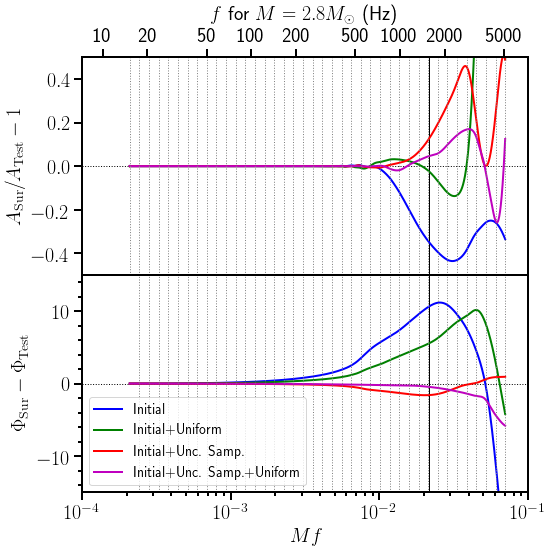

In [119]:
# Column for the error quantity
j = 8

npoints = 10000
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(8, 8))
fig.subplots_adjust(wspace=0, hspace=0)

ax1.axhline(0, ls=':', c='k', lw=1)
ax2.axhline(0, ls=':', c='k', lw=1)

ax1.axvline(MF_ISCO, ls='-', c='k', lw=1)
ax2.axvline(MF_ISCO, ls='-', c='k', lw=1)

i = np.argmax(errors_lhd[:, j])
params = testset_rand.get_waveform(i, data='parameters')
print i, params
h_true = testset_rand[i]
h_sur = sur_lhd.geometric_waveform(params)
# Resample and zero starting phase
h_sur.resample(h_true.x)
h_sur.phase -= h_sur.phase[0]
amp_ratio = wave.waveform_amplitude_ratio(h_sur, h_true, npoints=npoints, spacing='log')
phi_diff = wave.waveform_phase_difference(h_sur, h_true, npoints=npoints, spacing='log')
ax1.plot(amp_ratio.x, amp_ratio.amp-1.0, lw=2, c='b')
ax2.plot(phi_diff.x, phi_diff.phase, lw=2, c='b', label='Initial')

i = np.argmax(errors_uniform[:, j])
params = testset_rand.get_waveform(i, data='parameters')
print i, params
h_true = testset_rand[i]
h_sur = sur_uniform.geometric_waveform(params)
# Resample and zero starting phase
h_sur.resample(h_true.x)
h_sur.phase -= h_sur.phase[0]
amp_ratio = wave.waveform_amplitude_ratio(h_sur, h_true, npoints=npoints, spacing='log')
phi_diff = wave.waveform_phase_difference(h_sur, h_true, npoints=npoints, spacing='log')
ax1.plot(amp_ratio.x, amp_ratio.amp-1.0, lw=2, c='g')
ax2.plot(phi_diff.x, phi_diff.phase, lw=2, c='g', label='Initial+Uniform')

i = np.argmax(errors_uncsamp[:, j])
params = testset_rand.get_waveform(i, data='parameters')
print i, params
h_true = testset_rand[i]
h_sur = sur_uncsamp.geometric_waveform(params)
# Resample and zero starting phase
h_sur.resample(h_true.x)
h_sur.phase -= h_sur.phase[0]
amp_ratio = wave.waveform_amplitude_ratio(h_sur, h_true, npoints=npoints, spacing='log')
phi_diff = wave.waveform_phase_difference(h_sur, h_true, npoints=npoints, spacing='log')
ax1.plot(amp_ratio.x, amp_ratio.amp-1.0, lw=2, c='r')
ax2.plot(phi_diff.x, phi_diff.phase, lw=2, c='r', label='Initial+Unc. Samp.')

i = np.argmax(errors_uncsamp_uniform[:, j])
params = testset_rand.get_waveform(i, data='parameters')
print i, params
h_true = testset_rand[i]
h_sur = sur_uncsamp_uniform.geometric_waveform(params)
# Resample and zero starting phase
h_sur.resample(h_true.x)
h_sur.phase -= h_sur.phase[0]
amp_ratio = wave.waveform_amplitude_ratio(h_sur, h_true, npoints=npoints, spacing='log')
phi_diff = wave.waveform_phase_difference(h_sur, h_true, npoints=npoints, spacing='log')
ax1.plot(amp_ratio.x, amp_ratio.amp-1.0, lw=2, c='m')
ax2.plot(phi_diff.x, phi_diff.phase, lw=2, c='m', label=r'Initial+Unc. Samp.+Uniform')

for mf in sur_lhd.mf_amp:
    ax1.axvline(mf, c='gray', ls=':', lw=1)

for mf in sur_lhd.mf_phase:
    ax2.axvline(mf, c='gray', ls=':', lw=1)
    
ax1.set_xlim(0.0001, 0.1)
ax1.set_ylim(-0.5, 0.5)
ax2.set_ylim(-15, 15)

ax1.set_xscale('log')
ax2.set_xscale('log')

ax1.minorticks_on()
ax2.minorticks_on()

ax1.set_ylabel(r'$A_{\rm Sur}/A_{\rm Test} - 1$')
ax2.set_ylabel(r'$\Phi_{\rm Sur} - \Phi_{\rm Test}$')
ax2.set_xlabel(r'$Mf$')

ax2.legend(loc='lower left')

# Draw second x-axis scale
ax3 = ax1.twiny()
ax3.set_xscale('log')
ax3.set_xlim(ax1.get_xlim())
fs = np.array([10, 20, 50, 100, 200, 500, 1000, 2000, 5000])
mfs = f_to_mf(fs, 2.8)
ax3.set_xticks(mfs, minor=False)
ax3.set_xticklabels([str(f) for f in fs])
ax3.minorticks_off()
ax3.set_xlabel('$f$ for $M=2.8M_\odot$ (Hz)')

#fig.savefig('../../paper/htildemaxerror.pdf', format='pdf', transparent=True, bbox_inches='tight')

# Frequency-domain waveform and residuals 

In [108]:
h_train = ws.HDF5WaveformSet('../../data/TEOBv4QM_production/h_train_corners_lhd_xi.hdf5')
dh_train = ws.HDF5WaveformSet('../../data/TEOBv4QM_production/dh_train_corners_lhd_xi.hdf5')

dh_train.parameters().shape

(160, 5)

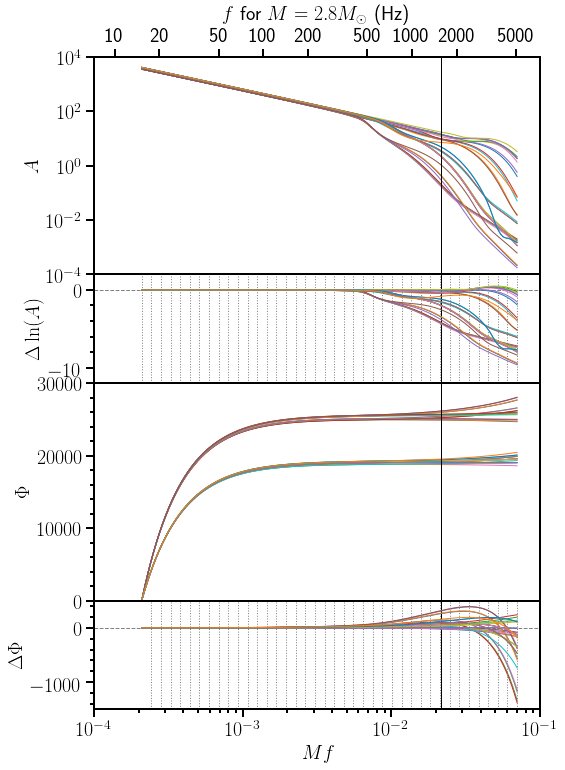

In [112]:
sur = sur_uncsamp_uniform

# Use the first 32 waveforms which are at the 32 corners of parameter space
nwave = 32

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(8, 12), 
                                         gridspec_kw={'height_ratios':[1, 0.5, 1, 0.5]})
fig.subplots_adjust(wspace=0, hspace=0)


for i in range(nwave):
    h = h_train[i]
    #ax1.plot(h.x, h.amp, c='k', lw=1)
    ax1.plot(h.x, h.amp, lw=1)

ax1.axvline(MF_ISCO, c='k', lw=1)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(r'$A$')
ax1.minorticks_on()
ax1.set_xlim(1.0e-4, 1.0e-1)
ax1.set_ylim(1.0e-4, 1.0e4)


ax2.axhline(0, c='gray', ls='--', lw=1)
ax2.axvline(MF_ISCO, c='k', lw=1)

for i in range(nwave):
    dh = dh_train[i]
    #ax2.plot(dh.x, dh.amp, c='k', lw=1)
    ax2.plot(dh.x, dh.amp, lw=1)
    
for mf in sur.mf_amp:
    ax2.axvline(mf, c='gray', ls=':', lw=1)

ax2.set_xscale('log')
ax2.set_ylabel(r'$\Delta\ln(A)$')
ax2.minorticks_on()
ax2.set_ylim(-12, 2)


for i in range(nwave):
    h = h_train[i]
    #ax3.plot(h.x, h.phase, c='k', lw=1)
    ax3.plot(h.x, h.phase, lw=1)

ax3.axvline(MF_ISCO, c='k', lw=1)
ax3.set_xscale('log')
ax3.set_ylabel(r'$\Phi$')
ax3.minorticks_on()
ax3.set_ylim(0, 30000)

ax4.axhline(0, c='gray', ls='--', lw=1)
ax4.axvline(MF_ISCO, c='k', lw=1)

for i in range(nwave):
    dh = dh_train[i]
    #ax4.plot(dh.x, dh.phase, c='k', lw=1)
    ax4.plot(dh.x, dh.phase, lw=1)

for mf in sur.mf_phase:
    ax4.axvline(mf, c='gray', ls=':', lw=1)

ax4.set_xscale('log')
ax4.set_xlabel(r'$Mf$')
ax4.set_ylabel(r'$\Delta\Phi$')
ax4.minorticks_on()
ax4.set_ylim(-1500, 500)
#ax4.set_ylim(-500, 500)

# Draw second x-axis scale
ax5 = ax1.twiny()
ax5.set_xscale('log')
ax5.set_xlim(ax1.get_xlim())
fs = np.array([10, 20, 50, 100, 200, 500, 1000, 2000, 5000])
mfs = f_to_mf(fs, 2.8)
ax5.set_xticks(mfs, minor=False)
ax5.set_xticklabels([str(f) for f in fs])
ax5.minorticks_off()
ax5.set_xlabel('$f$ for $M=2.8M_\odot$ (Hz)')


#fig.savefig('../../paper/hoff.pdf', format='pdf', transparent=True, bbox_inches='tight')

# 1d cross section

In [113]:
h_test = ws.HDF5WaveformSet('../../data/TEOBv4QM_production/h_test1d_S1.hdf5')
dh_test = ws.HDF5WaveformSet('../../data/TEOBv4QM_production/dh_test1d_S1.hdf5')

print h_test.parameters().shape
print dh_test.parameters().shape

(51, 5)
(51, 5)


[ 6.e-01 -5.e-01  2.e-01  2.e+03  1.e+03]


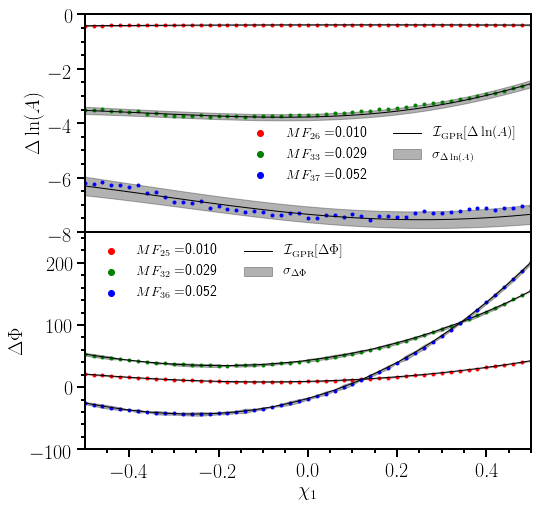

In [118]:
sur = sur_uncsamp_uniform

params = dh_test.parameters()
nwave = len(params)
print params[0]

# Do coordinate transformation
def xi_of_lam(lam, a=100):
    return np.log10(lam/a + 1)
lam1 = params[:, 3]
lam2 = params[:, 4]
xi1 = xi_of_lam(lam1)
xi2 = xi_of_lam(lam2)
params[:, 3] = xi1
params[:, 4] = xi2


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
fig.subplots_adjust(wspace=0, hspace=0)

for j, c in zip([26, 33, 37], ['r', 'g', 'b']):
    # Node frequency
    mf = sur.mf_amp[j]
    
    # Values at node mf for test set and GP prediction/error
    damp_test = np.array([dh_test[i].interpolate('amp')(mf) for i in range(nwave)])
    damp_gp = sur.damp_gp_list[j]
    damp_gp_eval, damp_gp_eval_err = damp_gp.predict(params, return_std=True)
    
    # Double {{}} is needed to treat {} literally as a latex expression. The inner {} is used for .format()
    # The spin parameter S_1
    p = params[:, 1]
    ax1.plot(p, damp_test, c=c, ls='', marker='o', ms=3, label=r'$MF_{{{}}}=${:.3f}'.format(j, mf))
    ax1.plot(p, damp_gp_eval, ls='-', lw=1, c='k')
    ax1.fill_between(p, damp_gp_eval-damp_gp_eval_err, damp_gp_eval+damp_gp_eval_err, color='k', alpha=0.3)

ax1.plot(0, 0, ls='-', lw=1, c='k', label=r'$\mathcal{I}_{\rm GPR}[\Delta\ln(A)]$')
ax1.fill_between([0], [0], [0], color='k', alpha=0.3, label=r'$\sigma_{\Delta\ln(A)}$')
ax1.minorticks_on()
#ax1.grid(which='both')
ax1.set_xlim(-0.5, 0.5)
ax1.set_ylim(-8, 0)
ax1.set_ylabel(r'$\Delta\ln(A)$')
ax1.legend(ncol=2, loc=(0.35, 0.2), markerscale=2, frameon=False)
ax1.xaxis.set_ticklabels([])

for j, c in zip([25, 32, 36], ['r', 'g', 'b']):
    # Node frequency
    mf = sur.mf_phase[j]
    
    # Values at node mf for test set and GP prediction/error
    dphase_test = np.array([dh_test[i].interpolate('phase')(mf) for i in range(nwave)])
    dphase_gp = sur.dphase_gp_list[j]
    dphase_gp_eval, dphase_gp_eval_err = dphase_gp.predict(params, return_std=True)
    
    p = params[:, 1]
    ax2.plot(p, dphase_test, c=c, ls='', marker='o', ms=3, label=r'$MF_{{{}}}=${:.3f}'.format(j, mf))
    ax2.plot(p, dphase_gp_eval, ls='-', lw=1, c='k')
    ax2.fill_between(p, dphase_gp_eval-dphase_gp_eval_err, dphase_gp_eval+dphase_gp_eval_err, color='k', alpha=0.3)

ax2.plot(0, 0, ls='-', lw=1, c='k', label=r'$\mathcal{I}_{\rm GPR}[\Delta\Phi]$')
ax2.fill_between([0], [0], [0], color='k', alpha=0.3, label=r'$\sigma_{\Delta\Phi}$')
ax2.minorticks_on()
#ax2.grid(which='both')
ax2.set_xlim(-0.5, 0.5)
ax2.set_ylim(-100, 250)
ax2.set_ylabel(r'$\Delta\Phi$')
ax2.set_xlabel(r'$\chi_1$')
ax2.legend(ncol=2, loc='upper left', markerscale=2, frameon=False)

#fig.savefig('../../paper/dhofs.pdf', format='pdf', transparent=True, bbox_inches='tight')

# Old stuff

In [13]:
import gaussianprocessregression as gpr

def print_hyperparameters(gp):
    hp = gpr.get_hyperparameters(gp)
    sigma_f = hp[0]
    sigma_n = hp[6]
    ymin = np.min(gp.y_train_)
    ymax = np.max(gp.y_train_)
    print ymin, ymax, sigma_f/(ymax-ymin), sigma_n/(ymax-ymin)
    #print dphase_gp.kernel_
    print 'sigma_f={:.3f}, sigma_n={:.7f}'.format(sigma_f, sigma_n)
    print '[l_q, l_s1, l_s2, l_lam1, l_lam2] = [{:.3f}, {:.3f}, {:.3f}, {:.0f}, {:.0f}]'.format(
    hp[1], hp[2], hp[3], hp[4], hp[5])

0.0010809372401678102
-505.5418008798447 215.11788207557396 4.9132359536956365 7.01498658571578e-06
sigma_f=3540.771, sigma_n=0.0050554
[l_q, l_s1, l_s2, l_lam1, l_lam2] = [3.916, 5.879, 9.754, 5, 14]


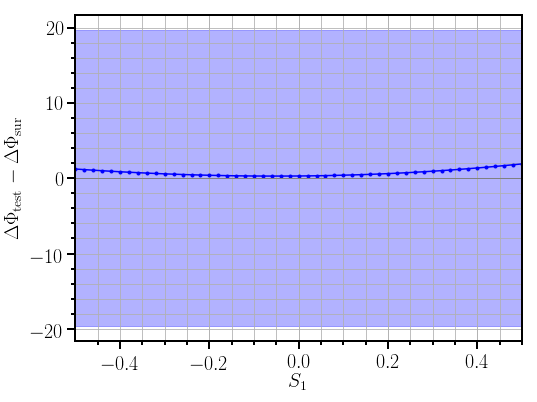

In [14]:
params = dh_test.parameters()
nwave = len(params)

# Get node frequency
#j = 32
j = 10
mf = sur.mf_phase[j]

print mf
print_hyperparameters(dphase_gp)

# Values at node mf for test set and GP prediction/error
dphase_test = np.array([dh_test[i].interpolate('phase')(mf) for i in range(nwave)])
dphase_gp = sur.dphase_gp_list[j]
dphase_gp_eval, dphase_gp_eval_err = dphase_gp.predict(params, return_std=True)

# S_1 component of parameters
p = params[:, 1]

fig, ax = plt.subplots(figsize=(8, 6))
c='b'
ax.plot(p, dphase_test-dphase_gp_eval, c=c, ls='-', marker='o', ms=3)
ax.fill_between(p, -dphase_gp_eval_err, dphase_gp_eval_err, color=c, alpha=0.3)

ax.axhline(0, c='gray', ls='-', lw=1)

ax.set_xlim(-0.5, 0.5)
ax.set_ylabel(r'$\Delta\Phi_{\rm test} - \Delta\Phi_{\rm sur}$')
ax.set_xlabel(r'$S_1$')
ax.minorticks_on()
ax.grid(which='both')

0.028639329652981414
1.57e+03**2 * Matern(length_scale=[3.66, 4.77, 7.27, 9.13, 17.1], nu=2.5) + WhiteKernel(noise_level=1.43e-05)
-37.29152544173747 378.19843948263417 3.7699046821281668 9.102468685410362e-06
sigma_f=1566.358, sigma_n=0.0037820
[l_q, l_s1, l_s2, l_lam1, l_lam2] = [3.659, 4.771, 7.270, 9, 17]


/Users/lackey/Library/Python/2.7/lib/python/site-packages/sklearn/gaussian_process/gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


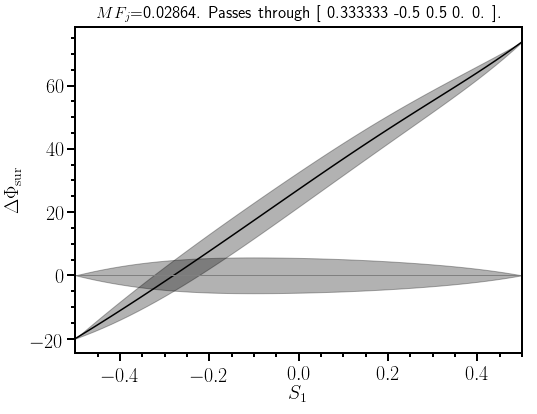

In [15]:
i = 4
#i = 100
point = dphase_gp.X_train_[i]
p = np.linspace(-0.5, 0.5, 51)
params = np.array([[point[0], s1, point[2], point[3], point[4]] for s1 in p])

# Get node frequency
#j = 32
j = 32
mf = sur.mf_phase[j]
print mf

# Values at node mf for test set and GP prediction/error
dphase_gp = sur.dphase_gp_list[j]
print dphase_gp.kernel_
print_hyperparameters(dphase_gp)
dphase_gp_eval, dphase_gp_eval_err = dphase_gp.predict(params, return_std=True)

# S_1 component of parameters
p = params[:, 1]

fig, ax = plt.subplots(figsize=(8, 6))
c='k'
ax.plot(p, dphase_gp_eval, c=c, ls='-', ms=3)
ax.fill_between(p, dphase_gp_eval-dphase_gp_eval_err, dphase_gp_eval+dphase_gp_eval_err, color=c, alpha=0.3)
ax.fill_between(p, -dphase_gp_eval_err, dphase_gp_eval_err, color=c, alpha=0.3)

ax.axhline(0, c='gray', ls='-', lw=1)
ax.set_title(r'$MF_j$={:.5f}. Passes through {}.'.format(mf, point))
ax.set_xlim(-0.5, 0.5)
ax.set_ylabel(r'$\Delta\Phi_{\rm sur}$')
ax.set_xlabel(r'$S_1$')
ax.minorticks_on()